import libraries

In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime

Create Master Dataset

In [3]:
import pandas as pd

def load_data(file_name):
    data1 = pd.read_excel(file_name)
    return data1

data1 = load_data('Conagra_competitor_data_Consolidated 1.xlsx')


In [97]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data1.head(5))

First few rows of the DataFrame:
       Date Month  Year                                     Geography  \
0  01-01-23   Jan  2023                Total US - Multi Outlet + Conv   
1  01-01-23   Jan  2023  Great Lakes - Standard - Multi Outlet + Conv   
2  01-08-23   Jan  2023                Total US - Multi Outlet + Conv   
3  01-29-23   Jan  2023                Total US - Multi Outlet + Conv   
4  02-26-23   Feb  2023                Total US - Multi Outlet + Conv   

      Brand Name                                            Product      Form  \
0  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...  MEATBALL   
1  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...  MEATBALL   
2  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...  MEATBALL   
3  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...  MEATBALL   
4  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...  MEATBALL   

  Flavor / Scent     Product Type Type Of

In [98]:
# Check for missing values
missing_values = data1.isnull().sum()

# Display fields with missing values
missing_fields = missing_values[missing_values > 0]
print("Fields with missing values:")
print(missing_fields)

Fields with missing values:
Unit Sales No Merch                                  4203
Unit Sales Any Merch                                65755
Unit Sales Price Reductions Only                    74371
Unit Sales Feature Only                            164192
Unit Sales Display Only                            134429
Unit Sales Feature and Display                     178809
Volume Sales No Merch                                4203
Volume Sales Any Merch                              65755
Volume Sales Price Reductions Only                  74371
Volume Sales Feature Only                          164192
Volume Sales Display Only                          134429
Volume Sales Feature and Display                   178809
Dollar Sales No Merch                                4203
Dollar Sales Any Merch                              65755
Dollar Sales Price Reductions Only                  74371
Dollar Sales Feature Only                          164192
Dollar Sales Display Only                   

In [99]:
# List of selected variables
selected_variables = ['Date', 'Month', 'Year', 'Geography', 'Brand Name', 'Product', 'Product Type', 'Dollar Sales', 'Volume Sales Any Merch', 'Volume Sales No Merch', 'Unit Sales Any Merch', 'Unit Sales No Merch', 'Dollar Sales Any Merch', 'Dollar Sales No Merch']  # Replace with your selected variables

# Create new DataFrame data2 with selected variables
data2 = data1[selected_variables].copy()

# Display the new DataFrame
print("DataFrame data2 with selected variables:")
print(data2.head())


DataFrame data2 with selected variables:
       Date Month  Year                                     Geography  \
0  01-01-23   Jan  2023                Total US - Multi Outlet + Conv   
1  01-01-23   Jan  2023  Great Lakes - Standard - Multi Outlet + Conv   
2  01-08-23   Jan  2023                Total US - Multi Outlet + Conv   
3  01-29-23   Jan  2023                Total US - Multi Outlet + Conv   
4  02-26-23   Feb  2023                Total US - Multi Outlet + Conv   

      Brand Name                                            Product  \
0  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...   
1  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...   
2  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...   
3  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...   
4  PRIVATE LABEL  PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...   

      Product Type  Dollar Sales  Volume Sales Any Merch  \
0  MEAT SUBSTITUTE      4.810528 

In [118]:
# Data cleaning
# Fill missing values with the mean of the respective columns
data2.fillna(data2.mean(), inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_43256\3507017825.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.fillna(data2.mean(), inplace=True)


In [119]:
# Check for missing values
missing_values = data2.isnull().sum()

# Display fields with missing values
missing_fields = missing_values[missing_values > 0]
print("Fields with missing values:")
print(missing_fields)

Fields with missing values:
Series([], dtype: int64)


In [120]:
# Summary statistics
print("\nSummary statistics:")
print(data2.describe())


Summary statistics:
                Year  Dollar Sales  Volume Sales Any Merch  \
count  183958.000000  1.839580e+05           183958.000000   
mean     2023.048446  9.135654e+03              527.938111   
std         0.214707  3.375081e+04             1671.974429   
min      2023.000000  7.852817e-02                0.242906   
25%      2023.000000  1.106795e+02               17.500000   
50%      2023.000000  7.695818e+02              309.312869   
75%      2023.000000  5.054087e+03              527.938111   
max      2024.000000  1.052686e+06            93050.421150   

       Volume Sales No Merch  Unit Sales Any Merch  Unit Sales No Merch  \
count          183958.000000         183958.000000        183958.000000   
mean              800.722303            763.634468          1138.822343   
std              2817.377602           2422.378087          3987.472585   
min                 0.003306              1.000000             0.010000   
25%                 9.865159             26.6

In [121]:
# Calculate average volume sales with and without merchandise
volume_sales_with_merch = data2['Volume Sales Any Merch'].mean()
volume_sales_no_merch = data2['Volume Sales No Merch'].mean()

# Calculate total sales for each merchandise category
total_sales_with_merch = data2['Volume Sales Any Merch'].sum()
total_sales_no_merch = data2['Volume Sales No Merch'].sum()

In [122]:
# Print insights
print("Average Volume Sales with Merchandise:", volume_sales_with_merch)
print("Average Volume Sales without Merchandise:", volume_sales_no_merch)
print("Total Volume Sales with Merchandise:", total_sales_with_merch)
print("Total Volume Sales without Merchandise:", total_sales_no_merch)

Average Volume Sales with Merchandise: 527.938110772564
Average Volume Sales without Merchandise: 800.7223030381401
Total Volume Sales with Merchandise: 97118438.98149931
Total Volume Sales without Merchandise: 147299273.42229018


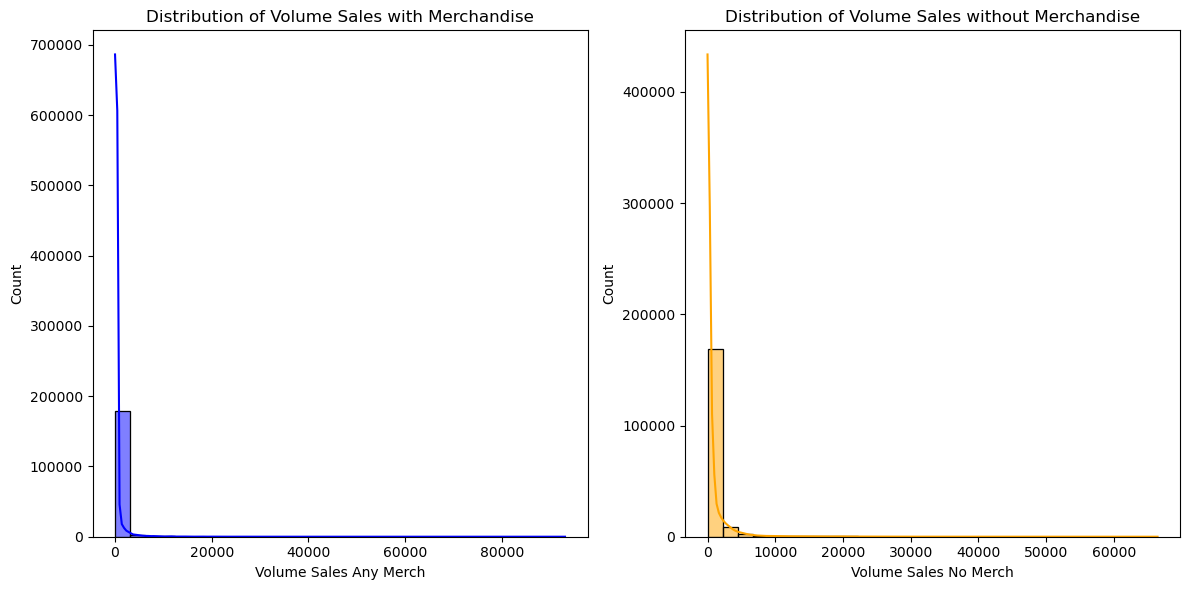

In [123]:
# Visualize the distribution of volume sales with and without merchandise
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data2['Volume Sales Any Merch'], bins=30, kde=True, color='blue')
plt.title('Distribution of Volume Sales with Merchandise')

plt.subplot(1, 2, 2)
sns.histplot(data2['Volume Sales No Merch'], bins=30, kde=True, color='orange')
plt.title('Distribution of Volume Sales without Merchandise')

plt.tight_layout()
plt.show()

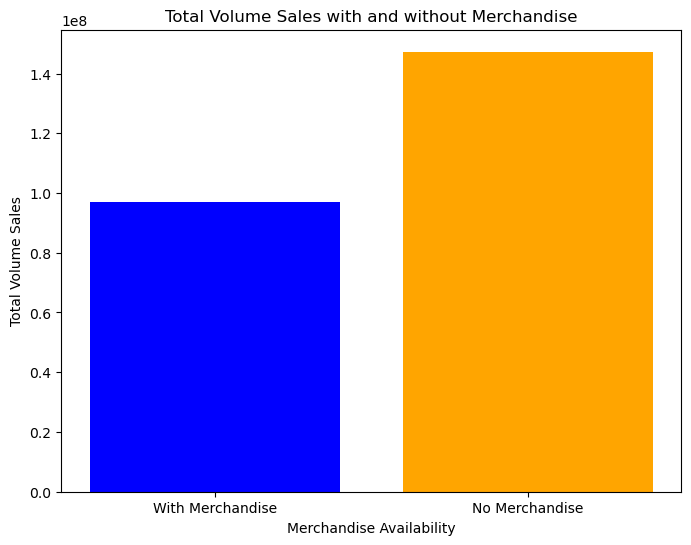

In [124]:
# Compare the total volume sales with and without merchandise
plt.figure(figsize=(8, 6))
plt.bar(['With Merchandise', 'No Merchandise'], [total_sales_with_merch, total_sales_no_merch], color=['blue', 'orange'])
plt.title('Total Volume Sales with and without Merchandise')
plt.xlabel('Merchandise Availability')
plt.ylabel('Total Volume Sales')
plt.show()

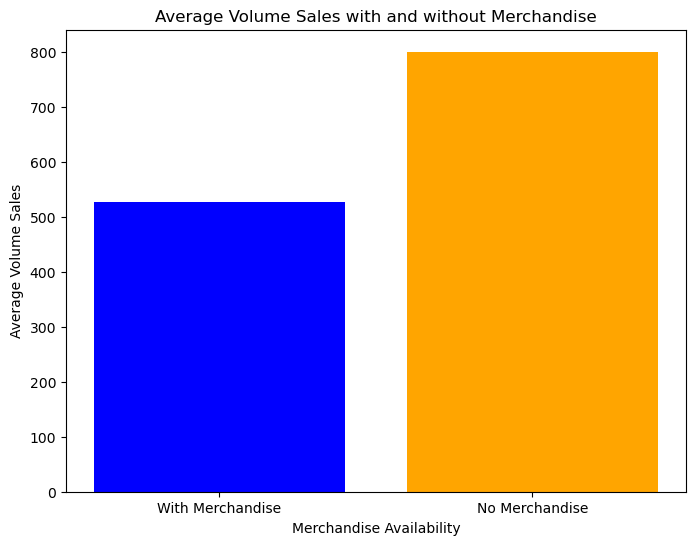

In [125]:
# Compare the average volume sales with and without merchandise
plt.figure(figsize=(8, 6))
plt.bar(['With Merchandise', 'No Merchandise'], [volume_sales_with_merch, volume_sales_no_merch], color=['blue', 'orange'])
plt.title('Average Volume Sales with and without Merchandise')
plt.xlabel('Merchandise Availability')
plt.ylabel('Average Volume Sales')
plt.show()

In [126]:
# Compare the average unit sales with and without merchandise
avg_unit_sales_with_merch = data2['Unit Sales Any Merch'].mean()
avg_unit_sales_no_merch = data2['Unit Sales No Merch'].mean()
# Compare the average dollar sales with and without merchandise
avg_dollar_sales_with_merch = data2['Dollar Sales Any Merch'].mean()
avg_dollar_sales_no_merch = data2['Dollar Sales No Merch'].mean()

In [127]:
print('Average unit sales with merch:', avg_unit_sales_with_merch)
print('Average unit sales no merch:', avg_unit_sales_no_merch)
print('Average dollar sales with merch:', avg_dollar_sales_with_merch)
print('Average dollar sales no merch:', avg_dollar_sales_no_merch)

Average unit sales with merch: 763.634468374597
Average unit sales no merch: 1138.822342711718
Average dollar sales with merch: 3867.5342183246635
Average dollar sales no merch: 6806.055191786395


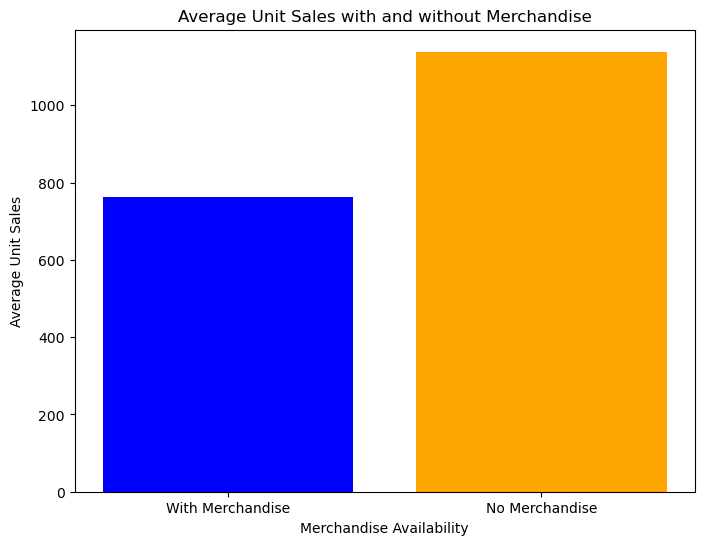

In [128]:
plt.figure(figsize=(8, 6))
plt.bar(['With Merchandise', 'No Merchandise'], [avg_unit_sales_with_merch, avg_unit_sales_no_merch], color=['blue', 'orange'])
plt.title('Average Unit Sales with and without Merchandise')
plt.xlabel('Merchandise Availability')
plt.ylabel('Average Unit Sales')
plt.show()

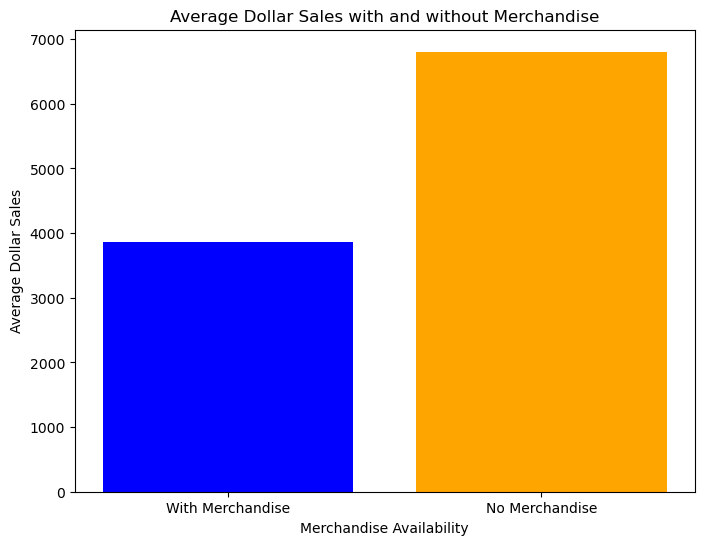

In [129]:
plt.figure(figsize=(8, 6))
plt.bar(['With Merchandise', 'No Merchandise'], [avg_dollar_sales_with_merch, avg_dollar_sales_no_merch], color=['blue', 'orange'])
plt.title('Average Dollar Sales with and without Merchandise')
plt.xlabel('Merchandise Availability')
plt.ylabel('Average Dollar Sales')
plt.show()

In [130]:
# Separate features (X) and target variable (y)
X = data2.drop('Dollar Sales', axis=1)  # Features
y = data2['Dollar Sales']  # Target variable

X.head(5)

,Date,Month,Year,Geography,Brand Name,Product,Product Type,Volume Sales Any Merch,Volume Sales No Merch,Unit Sales Any Merch,Unit Sales No Merch,Dollar Sales Any Merch,Dollar Sales No Merch
0,01-01-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,527.938111,1.071387,763.634468,1.071387,3867.534218,4.810528
1,01-01-23,Jan,2023,Great Lakes - Standard - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,527.938111,1.071387,763.634468,1.071387,3867.534218,4.810528
2,01-08-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,527.938111,2.134178,763.634468,2.134178,3867.534218,9.582459
3,01-29-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,527.938111,1.075400,763.634468,1.075400,3867.534218,4.828546
4,02-26-23,Feb,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,1.005145,800.722303,1.005145,1138.822343,4.513101,6806.055192


In [131]:
# Label encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Month', 'Geography', 'Brand Name', 'Product', 'Product Type'], dtype='object')

In [132]:
X_label_encoded = X.copy()
encoder_dict = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    X_label_encoded[col] = encoder.fit_transform(X[col])
    encoder_dict[col] = encoder

X_label_encoded

,Date,Month,Year,Geography,Brand Name,Product,Product Type,Volume Sales Any Merch,Volume Sales No Merch,Unit Sales Any Merch,Unit Sales No Merch,Dollar Sales Any Merch,Dollar Sales No Merch
0,0,4,2023,7,117,553,3,527.938111,1.071387,763.634468,1.071387,3867.534218,4.810528
1,0,4,2023,1,117,553,3,527.938111,1.071387,763.634468,1.071387,3867.534218,4.810528
2,2,4,2023,7,117,553,3,527.938111,2.134178,763.634468,2.134178,3867.534218,9.582459
3,7,4,2023,7,117,553,3,527.938111,1.075400,763.634468,1.075400,3867.534218,4.828546
4,11,3,2023,7,117,553,3,1.005145,800.722303,1.005145,1138.822343,4.513101,6806.055192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183953,3,4,2024,1,21,78,3,266.837901,40.331617,251.141554,37.959169,1765.684188,302.674419
183954,5,4,2024,1,21,78,3,255.085662,65.253235,240.080623,61.414809,1719.833802,504.540366
183955,1,4,2024,4,21,78,3,527.938111,1.123535,763.634468,1.057445,3867.534218,9.506431
183956,3,4,2024,4,21,78,3,527.938111,1.123609,763.634468,1.057514,3867.534218,9.507050


In [133]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label_encoded)
X_scaled

array([[-1.66989622e+00, -3.73356840e-01, -2.25637611e-01, ...,
        -2.85332130e-01,  7.35444315e-17, -2.83497046e-01],
       [-1.66989622e+00, -3.73356840e-01, -2.25637611e-01, ...,
        -2.85332130e-01,  7.35444315e-17, -2.83497046e-01],
       [-1.54473343e+00, -3.73356840e-01, -2.25637611e-01, ...,
        -2.85065597e-01,  7.35444315e-17, -2.83298137e-01],
       ...,
       [-1.60731482e+00, -3.73356840e-01,  4.43188524e+00, ...,
        -2.85335627e-01,  7.35444315e-17, -2.83301306e-01],
       [-1.48215204e+00, -3.73356840e-01,  4.43188524e+00, ...,
        -2.85335610e-01,  7.35444315e-17, -2.83301280e-01],
       [-1.35698926e+00, -3.73356840e-01,  4.43188524e+00, ...,
        -2.85335613e-01,  7.35444315e-17, -2.83279246e-01]])

In [134]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [135]:
# Create and train the Ridge regression model with regularization parameter alpha
alpha = 0.1  # Regularization parameter (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [136]:
# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

In [137]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

Ridge Regression Mean Squared Error: 3725269.22577414


In [138]:
# Calculate R-squared
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge)

Ridge Regression R-squared: 0.9964240424752682


In [139]:
# Number of predictors (features)
num_predictors = X_train.shape[1]

# Number of observations
num_observations = len(y_test)

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r2_ridge) * ((num_observations - 1) / (num_observations - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9964231999145


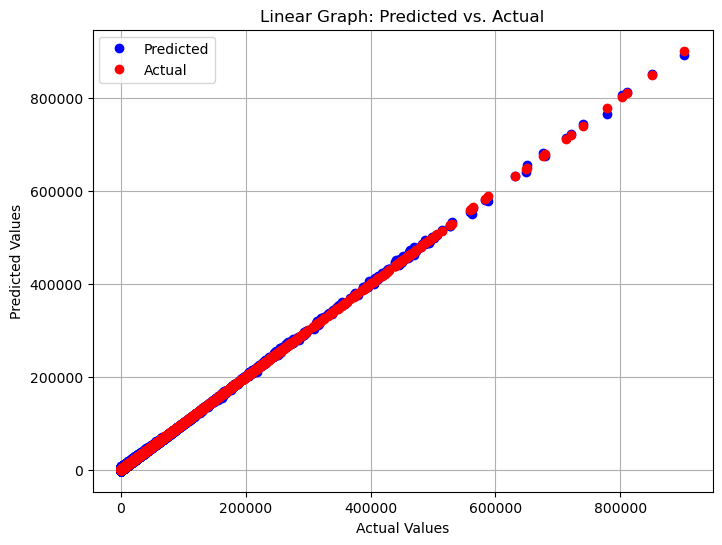

In [140]:
# Create a linear graph
plt.figure(figsize=(8, 6))

# Plot predicted values in blue
plt.plot(y_test, y_pred_ridge, 'o', color='blue', label='Predicted')

# Plot actual values in red
plt.plot(y_test, y_test, 'o', color='red', label='Actual')

# Add labels and title
plt.title('Linear Graph: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

C:\Users\kesha\AppData\Local\Temp\ipykernel_43256\1335622245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data2.corr()


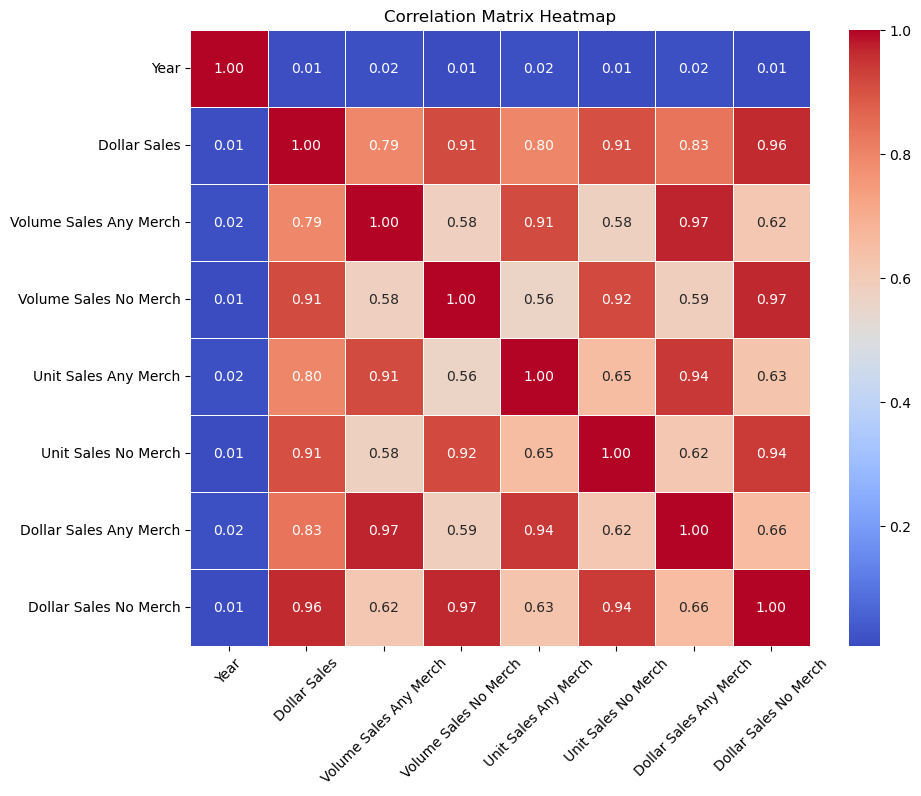

In [141]:
# Create the correlation matrix
correlation_matrix = data2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [142]:
# Set correlation threshold
correlation_threshold = 0.7 

In [143]:
# Find columns with correlation above the threshold
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

In [144]:
highly_correlated_columns

{'Dollar Sales Any Merch',
 'Dollar Sales No Merch',
 'Unit Sales Any Merch',
 'Unit Sales No Merch',
 'Volume Sales Any Merch',
 'Volume Sales No Merch'}

In [145]:
# Remove highly correlated columns from the DataFrame
data2_filtered = data2.drop(columns=highly_correlated_columns)

In [149]:
data2_filtered

,Date,Month,Year,Geography,Brand Name,Product,Product Type,Dollar Sales
0,01-01-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,4.810528
1,01-01-23,Jan,2023,Great Lakes - Standard - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,4.810528
2,01-08-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,9.582459
3,01-29-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,4.828546
4,02-26-23,Feb,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE,4.513101
...,...,...,...,...,...,...,...,...
183953,01-14-24,Jan,2024,Great Lakes - Standard - Multi Outlet + Conv,BUONA,BUONA FROZEN CHICAGO ITALIAN MEAT SUBSTITUTE 1...,MEAT SUBSTITUTE,2068.358606
183954,01-21-24,Jan,2024,Great Lakes - Standard - Multi Outlet + Conv,BUONA,BUONA FROZEN CHICAGO ITALIAN MEAT SUBSTITUTE 1...,MEAT SUBSTITUTE,2224.374168
183955,01-07-24,Jan,2024,Plains - Standard - Multi Outlet + Conv,BUONA,BUONA FROZEN CHICAGO ITALIAN MEAT SUBSTITUTE 1...,MEAT SUBSTITUTE,9.506431
183956,01-14-24,Jan,2024,Plains - Standard - Multi Outlet + Conv,BUONA,BUONA FROZEN CHICAGO ITALIAN MEAT SUBSTITUTE 1...,MEAT SUBSTITUTE,9.507050


Analyze Sales Performance with and without
Discounts

How has the sales been when the products are at discount and when its regularly priced. Both best and worst products

In [150]:
# Separate features (X) and target variable (y)
X = data2_filtered.drop('Dollar Sales', axis=1)  # Features
y = data2_filtered['Dollar Sales']  # Target variable

X.head(5)

,Date,Month,Year,Geography,Brand Name,Product,Product Type
0,01-01-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE
1,01-01-23,Jan,2023,Great Lakes - Standard - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE
2,01-08-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE
3,01-29-23,Jan,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE
4,02-26-23,Feb,2023,Total US - Multi Outlet + Conv,PRIVATE LABEL,PRIVATE LABEL FROZEN ZESTY ITALIAN MEAT SUBSTI...,MEAT SUBSTITUTE


In [151]:
# Label encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Month', 'Geography', 'Brand Name', 'Product', 'Product Type'], dtype='object')

In [152]:
X_label_encoded = X.copy()
encoder_dict = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    X_label_encoded[col] = encoder.fit_transform(X[col])
    encoder_dict[col] = encoder

X_label_encoded

,Date,Month,Year,Geography,Brand Name,Product,Product Type
0,0,4,2023,7,117,553,3
1,0,4,2023,1,117,553,3
2,2,4,2023,7,117,553,3
3,7,4,2023,7,117,553,3
4,11,3,2023,7,117,553,3
...,...,...,...,...,...,...,...
183953,3,4,2024,1,21,78,3
183954,5,4,2024,1,21,78,3
183955,1,4,2024,4,21,78,3
183956,3,4,2024,4,21,78,3


In [153]:
# Standardize the features
scaler = StandardScaler()
X_scaled_f = scaler.fit_transform(X_label_encoded)
X_scaled_f

array([[-1.66989622, -0.37335684, -0.22563761, ...,  0.89414225,
         0.92011665, -0.21772663],
       [-1.66989622, -0.37335684, -0.22563761, ...,  0.89414225,
         0.92011665, -0.21772663],
       [-1.54473343, -0.37335684, -0.22563761, ...,  0.89414225,
         0.92011665, -0.21772663],
       ...,
       [-1.60731482, -0.37335684,  4.43188524, ..., -1.29994045,
        -1.24229107, -0.21772663],
       [-1.48215204, -0.37335684,  4.43188524, ..., -1.29994045,
        -1.24229107, -0.21772663],
       [-1.35698926, -0.37335684,  4.43188524, ..., -1.29994045,
        -1.24229107, -0.21772663]])

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_f, y, test_size=0.3, random_state=42)

In [155]:
# Create and train the Ridge regression model with regularization parameter alpha
alpha = 0.1  # Regularization parameter (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [156]:
# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

In [157]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

Ridge Regression Mean Squared Error: 1016039459.0910165


In [158]:
# Calculate R-squared
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge)

Ridge Regression R-squared: 0.0246841962392772


In [159]:
# Number of predictors (features)
num_predictors = X_train.shape[1]

# Number of observations
num_observations = len(y_test)

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r2_ridge) * ((num_observations - 1) / (num_observations - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.02456047005902484


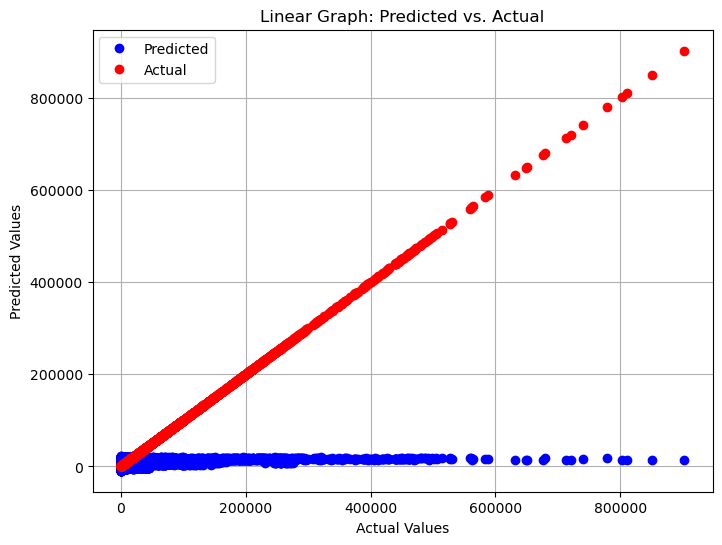

In [160]:
# Create a linear graph
plt.figure(figsize=(8, 6))

# Plot predicted values in blue
plt.plot(y_test, y_pred_ridge, 'o', color='blue', label='Predicted')

# Plot actual values in red
plt.plot(y_test, y_test, 'o', color='red', label='Actual')

# Add labels and title
plt.title('Linear Graph: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()